<a href="https://colab.research.google.com/github/Sriakhilarigela/Mini-project-image-classification/blob/master/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [2]:
dir='/content/drive/My Drive/mini project/images'
categories= ['cats','dogs']

In [3]:
import cv2
data=[]
for category in categories  :
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pet=cv2.imread(imgpath,0)
        try: 
            pet=cv2.cvtColor(pet,cv2.COLOR_BGR2RGB)
            pet=cv2.resize(pet,(64,64))
            image=np.array(pet).flatten()
            data.append([image,label])
        except Exception as e:
            pass

print(len(data))

1995


In [4]:
pick_in=open('data.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [5]:
pick_in=open('data.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [6]:
random.shuffle(data)
features = []
labels = []

In [7]:
for feature ,label in data:
  features.append(feature)
  labels.append(label)

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size= 0.98)

In [9]:
model=SVC(C=1,gamma='auto',kernel='poly')
model.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

In [11]:
pick = open('model.sav','rb')
model = pickle.load(pick)
pick.close()

In [12]:
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

In [13]:

print('Prediction  is :',categories[prediction[0]])

Prediction  is : cats


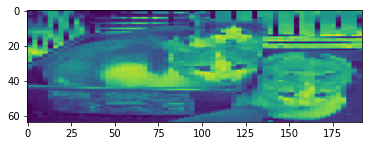

In [14]:
mypet = xtest[0].reshape(64,192)
cv2.cvtColor(mypet,cv2.COLOR_BGR2RGB)
plt.imshow(mypet)
plt.show()